In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

This dataset is about the performance of basketball teams. The **cbb.csv** data set includes performance data about five seasons of 354 basketball teams. It includes following fields:

| Field      | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| ---------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| TEAM       | The Division I college basketball school                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| CONF       | The Athletic Conference in which the school participates in (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference) |
| G          | Number of games played                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| W          | Number of games won                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| ADJOE      | Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ADJDE      | Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| BARTHAG    | Power Rating (Chance of beating an average Division I team)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| EFG_O      | Effective Field Goal Percentage Shot                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| EFG_D      | Effective Field Goal Percentage Allowed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| TOR        | Turnover Percentage Allowed (Turnover Rate)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| TORD       | Turnover Percentage Committed (Steal Rate)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| ORB        | Offensive Rebound Percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| DRB        | Defensive Rebound Percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| FTR        | Free Throw Rate (How often the given team shoots Free Throws)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| FTRD       | Free Throw Rate Allowed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| 2P_O       | Two-Point Shooting Percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| 2P_D       | Two-Point Shooting Percentage Allowed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| 3P_O       | Three-Point Shooting Percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| 3P_D       | Three-Point Shooting Percentage Allowed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| ADJ_T      | Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| WAB        | Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| POSTSEASON | Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| SEED       | Seed in the NCAA March Madness Tournament                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| YEAR       | Season                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |


In [ ]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%206/cbb.csv')
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,20.6,28.2,29.4,34.1,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,32.1,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,25.2,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,27.9,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [ ]:
df['YEAR'].value_counts()

2019    353
2018    351
2017    351
2016    351
Name: YEAR, dtype: int64

In [ ]:
df.shape

(1406, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406 entries, 0 to 1405
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        1406 non-null   object 
 1   CONF        1406 non-null   object 
 2   G           1406 non-null   int64  
 3   W           1406 non-null   int64  
 4   ADJOE       1406 non-null   float64
 5   ADJDE       1406 non-null   float64
 6   BARTHAG     1406 non-null   float64
 7   EFG_O       1406 non-null   float64
 8   EFG_D       1406 non-null   float64
 9   TOR         1406 non-null   float64
 10  TORD        1406 non-null   float64
 11  ORB         1406 non-null   float64
 12  DRB         1406 non-null   float64
 13  FTR         1406 non-null   float64
 14  FTRD        1406 non-null   float64
 15  2P_O        1406 non-null   float64
 16  2P_D        1406 non-null   float64
 17  3P_O        1406 non-null   float64
 18  3P_D        1406 non-null   float64
 19  ADJ_T       1406 non-null  

In [ ]:
df.isnull().sum()

TEAM             0
CONF             0
G                0
W                0
ADJOE            0
ADJDE            0
BARTHAG          0
EFG_O            0
EFG_D            0
TOR              0
TORD             0
ORB              0
DRB              0
FTR              0
FTRD             0
2P_O             0
2P_D             0
3P_O             0
3P_D             0
ADJ_T            0
WAB              0
POSTSEASON    1134
SEED          1134
YEAR             0
dtype: int64

Next we'll add a column that will contain "true" if the wins above bubble are over 7 and "false" if not. We'll call this column Win Index or "windex".

In [ ]:
df['windex'] = np.where(df.WAB > 7, 'True', 'False')

Next we'll filter the data set to the teams that made the Sweet Sixteen, the Elite Eight, and the Final Four in the post season.

In [ ]:
df1 = df.loc[df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
df1.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,32.1,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,False
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,25.2,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,True
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,27.9,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,True
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,20.2,34.1,30.5,40.3,32.0,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,False
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,20.4,33.5,35.3,35.4,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,False


In [ ]:
df1['POSTSEASON'].value_counts()

S16    32
E8     16
F4      8
Name: POSTSEASON, dtype: int64

In [ ]:
df1.shape

(56, 25)

In [ ]:
df1.groupby('YEAR').size()

YEAR
2016    14
2017    14
2018    14
2019    14
dtype: int64

In [ ]:
df1.groupby(['windex'])['POSTSEASON'].value_counts(normalize=True)

windex  POSTSEASON
False   S16           0.605263
        E8            0.263158
        F4            0.131579
True    S16           0.500000
        E8            0.333333
        F4            0.166667
Name: POSTSEASON, dtype: float64

In [ ]:
df1['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
df1.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,32.1,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,0
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,25.2,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,1
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,27.9,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,1
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,20.2,34.1,30.5,40.3,32.0,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,0
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,20.4,33.5,35.3,35.4,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,0


In [ ]:
X = df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
X[0:5]

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,windex
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,32.1,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,6.0,0
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,25.2,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,1.0,1
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,27.9,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,1.0,1
5,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,20.2,34.1,30.5,40.3,32.0,52.6,46.1,34.4,36.2,69.0,6.7,1.0,0
6,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,20.4,33.5,35.3,35.4,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,10.0,0


In [ ]:
y = df1['POSTSEASON'].values
y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

In [ ]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X.shape

(56, 21)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Validation set:', X_val.shape,  y_val.shape)

Train set: (44, 21) (44,)
Validation set: (12, 21) (12,)


# KNN

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

Ks = 15
mean_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_predict=neigh.predict(X_val)
    mean_acc[n-1] = accuracy_score(y_val, y_predict)
print('acc are: ',mean_acc)    # so the n_neighbor will be 5

acc are:  [0.33333333 0.33333333 0.5        0.58333333 0.66666667 0.58333333
 0.58333333 0.66666667 0.58333333 0.58333333 0.58333333 0.5
 0.58333333 0.58333333]


Test set Accuracy:  0.6666666666666666


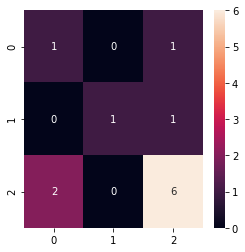

f1-score is:  0.6777777777777777


In [ ]:
k = 5
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
y_predict = neigh.predict(X_val)
print("Test set Accuracy: ", accuracy_score(y_val, y_predict))
cm = confusion_matrix(y_val, y_predict)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot=True)
plt.show()

print('f1-score is: ',f1_score(y_val, y_predict, average='weighted') )


In [ ]:
y_predict

array(['S16', 'S16', 'S16', 'E8', 'E8', 'E8', 'S16', 'F4', 'S16', 'S16',
       'S16', 'S16'], dtype=object)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

MD = 15
mean_acc = np.zeros((MD-1))
for n in range(1,MD):
    Tree = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train,y_train)
    y_predict=Tree.predict(X_val)
    mean_acc[n-1] = accuracy_score(y_val, y_predict)
print('acc are: ',mean_acc)    # so the max_depth will be 2

acc are:  [0.66666667 0.66666667 0.5        0.33333333 0.5        0.5
 0.41666667 0.5        0.41666667 0.5        0.5        0.5
 0.5        0.41666667]


Test set Accuracy:  0.6666666666666666


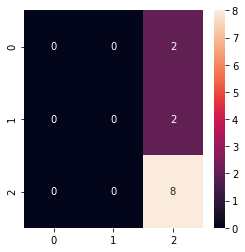

f1-score is:  0.5333333333333333


In [ ]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 2).fit(X_train,y_train)
y_predict = Tree.predict(X_val)

print("Test set Accuracy: ", accuracy_score(y_val, y_predict))
cm = confusion_matrix(y_val, y_predict)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot=True)
plt.show()

print('f1-score is: ',f1_score(y_val, y_predict, average='weighted') )

In [ ]:
y_predict

array(['S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16',
       'S16', 'S16', 'S16'], dtype=object)

# Support Vector Machine

In [ ]:
from sklearn import svm

MD = 5
mean_acc = np.zeros((MD-1))
S=['rbf','poly','linear','sigmoid']
for i in range(len(S)):
    clf = svm.SVC(kernel=S[i])
    clf.fit(X_train, y_train) 
    y_predict = clf.predict(X_val)
    mean_acc[i-1] = accuracy_score(y_val, y_predict)
print('acc are: ',mean_acc)    # so the rbf is chosen

acc are:  [0.66666667 0.25       0.58333333 0.58333333]


Test set Accuracy:  0.5833333333333334


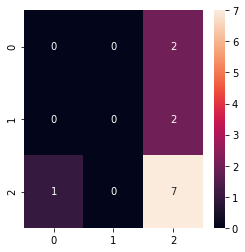

f1-score is:  0.49122807017543857


In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
y_predict = clf.predict(X_val)

print("Test set Accuracy: ", accuracy_score(y_val, y_predict))
cm = confusion_matrix(y_val, y_predict)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot=True)
plt.show()

print('f1-score is: ',f1_score(y_val, y_predict, average='weighted') )

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)  # ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ 
y_predict = LR.predict(X_val)
accuracy_score(y_val, y_predict)

0.5833333333333334

# Load Test set for evaluation

In [ ]:
test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/basketball_train.csv',error_bad_lines=False)
test_df.shape

(1757, 24)

In [ ]:
test_df['windex'] = np.where(test_df.WAB > 7, 'True', 'False')
test_df1 = test_df[test_df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
test_Feature = test_df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
test_Feature['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
test_X=test_Feature
test_X= preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_X[0:5]

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


array([[-4.08074446e-01, -1.10135297e+00,  3.37365934e-01,
         2.66479976e+00, -2.46831661e+00,  2.13703245e-01,
         9.44090550e-01, -1.19216365e+00, -1.64348924e+00,
         1.45405982e-02,  1.29523097e+00, -6.23533182e-01,
        -9.31788560e-01,  1.42784371e-01,  1.68876201e-01,
         2.84500844e-01,  1.62625961e+00, -8.36649260e-01,
        -9.98500539e-01,  4.84319174e-01, -6.77003200e-01],
       [ 3.63958290e-01,  3.26326807e-01,  7.03145068e-01,
        -7.13778644e-01,  1.07370841e+00,  4.82633172e-01,
         4.77498943e-01, -1.32975879e+00, -6.86193316e-02,
        -7.35448152e-01, -1.35447914e+00, -8.06829025e-01,
         3.41737757e-01,  4.96641291e-02,  9.40576311e-02,
         1.37214061e+00,  6.93854620e-01, -2.00860931e+00,
         9.80549967e-01, -1.19401460e+00,  1.47709789e+00],
       [ 3.63958290e-01,  1.18293467e+00,  9.31757027e-01,
        -8.78587347e-01,  1.23870131e+00,  7.85179340e-01,
        -9.22275877e-01,  5.27775662e-01, -1.86734575e

In [ ]:
test_y = test_df1['POSTSEASON'].values
test_y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

#SVM approach

f1-score:  0.7773809523809524
Test set Accuracy:  0.7428571428571429


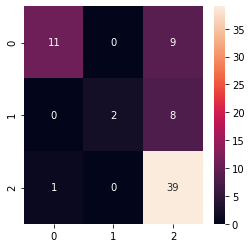

array(['S16', 'S16', 'E8', 'E8', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16',
       'S16', 'S16', 'E8', 'S16', 'S16', 'E8', 'E8', 'E8', 'S16', 'S16',
       'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16',
       'S16', 'E8', 'E8', 'S16', 'F4', 'S16', 'S16', 'S16', 'S16', 'S16',
       'S16', 'S16', 'S16', 'E8', 'S16', 'E8', 'E8', 'S16', 'F4', 'S16',
       'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'E8', 'S16',
       'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16',
       'S16', 'S16', 'S16'], dtype=object)

In [57]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
y_predict = clf.predict(test_X)
print('f1-score: ',f1_score(y_predict,test_y, average='weighted'))
print("Test set Accuracy: ", accuracy_score(test_y, y_predict))
cm = confusion_matrix(test_y, y_predict)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot=True)
plt.show()
y_predict

In [59]:
test_df1['pred'] = y_predict
test_df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex,pred
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,32.1,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,False,S16
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,25.2,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,True,S16
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,27.9,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,True,E8
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,20.2,34.1,30.5,40.3,32.0,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,False,E8
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,20.4,33.5,35.3,35.4,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,False,S16


In [63]:
df_res = test_df1[['TEAM','pred']]

#predicted team

In [67]:
df_res.reset_index(drop=True,inplace=True)
df_res

,TEAM,pred
0,Notre Dame,S16
1,Virginia,S16
2,Kansas,E8
3,Oregon,E8
4,Syracuse,S16
...,...,...
65,UCLA,S16
66,Utah,S16
67,West Virginia,S16
68,Wichita St.,S16


#F4 teams

In [68]:
df_res[df_res.pred=='F4']

,TEAM,pred
33,Loyola Chicago,F4
47,Auburn,F4


#E8 teams

In [69]:
df_res[df_res.pred=='E8']

,TEAM,pred
2,Kansas,E8
3,Oregon,E8
12,Texas A&M,E8
15,Xavier,E8
16,Florida,E8
17,Kentucky,E8
30,Kansas St.,E8
31,Texas Tech,E8
42,Duke,E8
44,Kentucky,E8
